# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [195]:
# Your code/answer goes here.
import numpy as np

# Các hằng số cho dễ đọc
ROWS = 6
COLS = 7
PLAYER_PIECE = 1
AI_PIECE = -1

# --- TRIỂN KHAI CÁC THÀNH PHẦN ---

def initial_state():
    """Trả về trạng thái ban đầu: một bàn cờ 6x7 trống."""
    return np.zeros((ROWS, COLS), dtype=int)

def actions(board):
    """Trả về danh sách các hành động (cột) hợp lệ."""
    return [col for col in range(COLS) if board[0][col] == 0]

def result(board, action, piece):
    """Trả về bàn cờ mới sau khi người chơi thả quân cờ vào cột `action`."""
    new_board = board.copy()
    for r in range(ROWS - 1, -1, -1):
        if new_board[r][action] == 0:
            new_board[r][action] = piece
            return new_board
    return None # Trả về None nếu hành động không hợp lệ

def check_win(board, piece):
    """Kiểm tra xem người chơi có quân cờ `piece` đã thắng hay chưa."""
    # Kiểm tra hàng ngang
    for c in range(COLS - 3):
        for r in range(ROWS):
            if np.all(board[r, c:c+4] == piece):
                return True
    # Kiểm tra hàng dọc
    for c in range(COLS):
        for r in range(ROWS - 3):
            if np.all(board[r:r+4, c] == piece):
                return True
    # Kiểm tra đường chéo dương (\)
    for c in range(COLS - 3):
        for r in range(ROWS - 3):
            if all(board[r+i, c+i] == piece for i in range(4)):
                return True
    # Kiểm tra đường chéo âm (/)
    for c in range(COLS - 3):
        for r in range(3, ROWS):
            if all(board[r-i, c+i] == piece for i in range(4)):
                return True
    return False

def is_terminal(board):
    """Kiểm tra xem trò chơi đã kết thúc hay chưa."""
    return check_win(board, PLAYER_PIECE) or check_win(board, AI_PIECE) or len(actions(board)) == 0

def utility(board, piece):
    """Trả về giá trị hữu ích (+1, -1, 0) cho một trạng thái kết thúc."""
    opponent_piece = AI_PIECE if piece == PLAYER_PIECE else PLAYER_PIECE
    if check_win(board, piece):
        return 1
    elif check_win(board, opponent_piece):
        return -1
    else: # Hòa
        return 0

# --- KIỂM TRA (TEST) CÁC HÀM ---
# Tạo một bàn cờ trống để bắt đầu
test_board = initial_state()
print("Trạng thái ban đầu (bàn cờ trống):")
print(test_board)
print("-" * 30)

# Kiểm tra các hành động hợp lệ
print(f"Các hành động hợp lệ ban đầu: {actions(test_board)}")
print("-" * 30)

# Thực hiện một nước đi
test_board = result(test_board, 3, PLAYER_PIECE)
print("Bàn cờ sau khi người chơi 1 thả vào cột 3:")
print(test_board)
print(f"Các hành động hợp lệ bây giờ: {actions(test_board)}")
print("-" * 30)

# Tạo một bàn cờ thắng để kiểm tra
win_board = initial_state()
for i in range(4):
    win_board = result(win_board, i, AI_PIECE)
print("Tạo một bàn cờ thắng cho người chơi -1:")
print(win_board)
print(f"Trò chơi đã kết thúc chưa? -> {is_terminal(win_board)}")
print(f"Giá trị hữu ích từ góc nhìn của người chơi -1 là: {utility(win_board, AI_PIECE)}")
print(f"Giá trị hữu ích từ góc nhìn của người chơi 1 là: {utility(win_board, PLAYER_PIECE)}")

Trạng thái ban đầu (bàn cờ trống):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
------------------------------
Các hành động hợp lệ ban đầu: [0, 1, 2, 3, 4, 5, 6]
------------------------------
Bàn cờ sau khi người chơi 1 thả vào cột 3:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
Các hành động hợp lệ bây giờ: [0, 1, 2, 3, 4, 5, 6]
------------------------------
Tạo một bàn cờ thắng cho người chơi -1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [-1 -1 -1 -1  0  0  0]]
Trò chơi đã kết thúc chưa? -> True
Giá trị hữu ích từ góc nhìn của người chơi -1 là: 1
Giá trị hữu ích từ góc nhìn của người chơi 1 là: -1


### Mô tả các thành phần của bài toán tìm kiếm

* **Trạng thái ban đầu (Initial State):** Là một bàn cờ trống, được biểu diễn bằng một ma trận NumPy kích thước 6x7 chứa toàn bộ giá trị là 0.

* **Hành động (Actions):** Tại mỗi trạng thái, các hành động hợp lệ là một danh sách các chỉ số cột (từ 0 đến 6) mà người chơi có thể thả quân cờ vào. Một cột được coi là hợp lệ nếu ô trên cùng của nó vẫn còn trống (giá trị là 0).

* **Mô hình chuyển tiếp (Transition Model - `result`):** Hàm này nhận vào trạng thái bàn cờ hiện tại, một hành động (cột đã chọn) và quân cờ của người chơi (1 hoặc -1). Nó trả về một trạng thái bàn cờ mới sau khi quân cờ đã được đặt vào vị trí trống thấp nhất của cột đó.

* **Trạng thái kết thúc và Hàm hữu ích (Goal State - `terminal` & `utility`):**
    * **Trạng thái kết thúc (`is_terminal`):** Trò chơi được xem là kết thúc khi một trong các điều kiện sau được thỏa mãn:
        * Một người chơi tạo được một hàng có 4 quân cờ liên tiếp (theo chiều ngang, dọc, hoặc chéo).
        * Tất cả các ô trên bàn cờ đã được lấp đầy, dẫn đến kết quả hòa.
    * **Hàm hữu ích (`utility`):** Được tính tại một trạng thái kết thúc từ góc nhìn của một người chơi cụ thể:
        * **+1:** Nếu người chơi đó thắng.
        * **-1:** Nếu đối thủ của họ thắng.
        * **0:** Nếu ván cờ hòa.

How big is the state space? Give an estimate and explain it.

In [196]:
# Your answer goes here.
# Ước tính kích thước không gian trạng thái

# Bàn cờ Connect 4 có 6 hàng và 7 cột, tổng cộng 42 ô.
# Mỗi ô có thể ở một trong 3 trạng thái: trống (0), người chơi 1 (1), hoặc người chơi -1 (-1).

# Do đó, một ước tính cận trên (upper bound) đơn giản cho số lượng trạng thái là 3 lũy thừa 42.
upper_bound = 3**42

print(f"Ước tính cận trên cho không gian trạng thái là 3^42 ≈ {upper_bound:e}")

Ước tính cận trên cho không gian trạng thái là 3^42 ≈ 1.094190e+20


**Giải thích:**
* Bàn cờ có **42 ô** (6 hàng x 7 cột).
* Mỗi ô có thể ở một trong **3 trạng thái**: trống (0), người chơi 1 (1), hoặc người chơi 2 (-1).
* Do đó, số lượng cấu hình bàn cờ tối đa có thể có là $3 \times 3 \times \dots \times 3$ (42 lần), tức là $3^{42}$.


How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [197]:
# Your answer goes here.
# Ước tính kích thước cây trò chơi

# Cây trò chơi biểu diễn tất cả các chuỗi nước đi có thể xảy ra.
# Hệ số nhánh (branching factor) `b` là số lựa chọn ở mỗi lượt, tối đa là 7 (cho 7 cột).
# Độ sâu (depth) `d` của cây là số nước đi tối đa trong một ván, là 42 (6x7).

# Một ước tính cận trên cho kích thước cây trò chơi là b^d.
branching_factor = 7
depth = 42
tree_size_upper_bound = branching_factor**depth

print(f"Ước tính cận trên cho kích thước cây trò chơi là {branching_factor}^{depth} ≈ {tree_size_upper_bound:e}")

Ước tính cận trên cho kích thước cây trò chơi là 7^42 ≈ 3.119735e+35




**Giải thích:**
* **Hệ số nhánh (`b`):** Tại mỗi lượt, một người chơi có tối đa **7 lựa chọn** (7 cột để thả quân cờ).
* **Độ sâu (`d`):** Một ván cờ có tối đa **42 lượt đi** (tương ứng với 42 ô trên bàn cờ).
* Do đó, tổng số nút lá trong cây trò chơi có thể được ước tính bằng $b^d = 7^{42}$.



## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [198]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

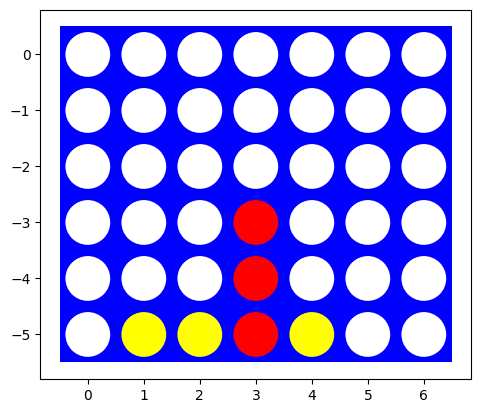

In [199]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [200]:
# Your code/ answer goes here.
# Your code/ answer goes here.
import numpy as np

# Các hằng số cho dễ đọc
ROWS = 6
COLS = 7
PLAYER_PIECE = 1
AI_PIECE = -1

# 1. Hàm actions(board)
def actions(board):
    """Trả về danh sách các cột hợp lệ (chưa đầy)."""
    return [col for col in range(board.shape[1]) if board[0][col] == 0]

# 2. Hàm result(board, player, action)
def result(board, player, action):
    """Thực hiện một nước đi và trả về bàn cờ mới."""
    new_board = board.copy()
    for r in range(board.shape[0] - 1, -1, -1):
        if new_board[r][action] == 0:
            new_board[r][action] = player
            return new_board
    return None # Hành động không hợp lệ

# Helper function để kiểm tra thắng
def check_win(board, piece):
    """Kiểm tra xem người chơi có quân cờ 'piece' đã thắng hay chưa."""
    rows, cols = board.shape
    # Ngang
    for c in range(cols - 3):
        for r in range(rows):
            if all(board[r, c+i] == piece for i in range(4)):
                return True
    # Dọc
    for c in range(cols):
        for r in range(rows - 3):
            if all(board[r+i, c] == piece for i in range(4)):
                return True
    # Chéo dương (\)
    for c in range(cols - 3):
        for r in range(rows - 3):
            if all(board[r+i, c+i] == piece for i in range(4)):
                return True
    # Chéo âm (/)
    for c in range(cols - 3):
        for r in range(3, rows):
            if all(board[r-i, c+i] == piece for i in range(4)):
                return True
    return False

# 3. Hàm terminal(board)
def terminal(board):
    """Kiểm tra xem trò chơi đã ở trạng thái kết thúc hay chưa."""
    return check_win(board, PLAYER_PIECE) or check_win(board, AI_PIECE) or len(actions(board)) == 0

# 4. Hàm utility(board, player)
def utility(board, player):
    """Trả về giá trị hữu ích cho một trạng thái kết thúc."""
    opponent = AI_PIECE if player == PLAYER_PIECE else PLAYER_PIECE
    if check_win(board, player):
        return 1
    elif check_win(board, opponent):
        return -1
    else:
        return 0

# --- PHẦN KIỂM TRA (TEST) ---
print("--- Bắt đầu Test các Hàm Helper ---")
board = np.zeros((ROWS, COLS), dtype=int)

# Test actions()
print(f"1. Test `actions`: Các cột hợp lệ trên bàn cờ trống -> {actions(board)}")

# Test result()
board_after_move = result(board, 3, PLAYER_PIECE)
print("\n2. Test `result`: Bàn cờ sau khi người chơi 1 đi vào cột 3:")
print(board_after_move)

# Test terminal() and utility()
win_board = board.copy()
win_board[5][0] = PLAYER_PIECE
win_board[5][1] = PLAYER_PIECE
win_board[5][2] = PLAYER_PIECE
win_board[5][3] = PLAYER_PIECE
print("\n3. Test `terminal` và `utility` trên bàn cờ thắng:")
print(win_board)
print(f"   - terminal(win_board) -> {terminal(win_board)}")
print(f"   - utility(win_board, PLAYER_PIECE) -> {utility(win_board, PLAYER_PIECE)}")
print(f"   - utility(win_board, AI_PIECE) -> {utility(win_board, AI_PIECE)}")

print("\n--- Kết thúc Test ---")

--- Bắt đầu Test các Hàm Helper ---
1. Test `actions`: Các cột hợp lệ trên bàn cờ trống -> [0, 1, 2, 3, 4, 5, 6]

2. Test `result`: Bàn cờ sau khi người chơi 1 đi vào cột 3:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]]

3. Test `terminal` và `utility` trên bàn cờ thắng:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0]]
   - terminal(win_board) -> True
   - utility(win_board, PLAYER_PIECE) -> 1
   - utility(win_board, AI_PIECE) -> -1

--- Kết thúc Test ---


### Giải thích 

* **`actions(board)`:** Hàm này nhận vào một bàn cờ và trả về một danh sách các cột mà người chơi có thể thả quân cờ vào. Nó hoạt động bằng cách kiểm tra hàng trên cùng (hàng 0) của mỗi cột. Nếu một ô ở hàng này vẫn còn trống (giá trị 0), cột đó được coi là một hành động hợp lệ.

* **`result(board, player, action)`:** Đây là hàm chuyển tiếp trạng thái. Nó tạo một bản sao của bàn cờ hiện tại để tránh thay đổi trạng thái gốc. Sau đó, nó tìm hàng trống thấp nhất trong cột `action` và đặt quân cờ của `player` vào đó, rồi trả về bàn cờ mới.

* **`terminal(board)`:** Hàm này kiểm tra xem trò chơi đã kết thúc hay chưa. Nó trả về `True` nếu một trong ba điều kiện được thỏa mãn: (1) người chơi 1 (`PLAYER_PIECE`) thắng, (2) người chơi -1 (`AI_PIECE`) thắng, hoặc (3) không còn hành động hợp lệ nào (bàn cờ đã đầy, dẫn đến hòa).

* **`utility(board, player)`:** Hàm này chỉ được gọi khi trò chơi đã ở trạng thái kết thúc (`terminal` trả về `True`). Nó tính toán giá trị của ván cờ từ góc nhìn của người chơi `player` được truyền vào: trả về **1** nếu họ thắng, **-1** nếu đối thủ của họ thắng, và **0** nếu hòa.

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [201]:
# Your code/ answer goes here.
# Your code/ answer goes here.
import random

def random_player(board, player = 1):
    """
    Tác nhân này nhận vào bàn cờ hiện tại và người chơi hiện tại,
    sau đó trả về một hành động hợp lệ được chọn ngẫu nhiên.
    """
    valid_actions = actions(board)
    if not valid_actions:
        return None # Không còn nước đi nào
    return random.choice(valid_actions)

# --- PHẦN KIỂM TRA (TEST) ---
print("--- Bắt đầu Test Tác nhân Ngẫu nhiên ---")
# Tạo một bàn cờ gần đầy
test_board_rand = np.array([
    [ 1, -1, 0, -1,  1, -1,  1],
    [-1,  1, 1,  1, -1,  1, -1],
    [ 1, -1, 1, -1,  1, -1,  1],
    [-1,  1,-1,  1, -1,  1, -1],
    [ 1, -1, 1, -1,  1, -1,  1],
    [-1,  1,-1,  1, -1,  1, -1]
], dtype=int)

print("Bàn cờ thử nghiệm:")
print(test_board_rand)
valid_moves = actions(test_board_rand)
print(f"Các nước đi hợp lệ: {valid_moves}")

# Chạy tác nhân ngẫu nhiên
chosen_action = random_player(test_board_rand, 1)
print(f"Tác nhân ngẫu nhiên đã chọn cột: {chosen_action}")
print(f"Nước đi được chọn có nằm trong danh sách hợp lệ không? -> {chosen_action in valid_moves}")
print("\n--- Kết thúc Test ---")

--- Bắt đầu Test Tác nhân Ngẫu nhiên ---
Bàn cờ thử nghiệm:
[[ 1 -1  0 -1  1 -1  1]
 [-1  1  1  1 -1  1 -1]
 [ 1 -1  1 -1  1 -1  1]
 [-1  1 -1  1 -1  1 -1]
 [ 1 -1  1 -1  1 -1  1]
 [-1  1 -1  1 -1  1 -1]]
Các nước đi hợp lệ: [2]
Tác nhân ngẫu nhiên đã chọn cột: 2
Nước đi được chọn có nằm trong danh sách hợp lệ không? -> True

--- Kết thúc Test ---


### Giải thích 

Hàm `random_player(board, player)` là một tác nhân chơi game đơn giản.
1.  Nó gọi hàm `actions(board)` để lấy danh sách tất cả các cột hợp lệ có thể đi.
2.  Sau đó, nó sử dụng thư viện `random` của Python để chọn một phần tử ngẫu nhiên từ danh sách này.
3.  Cuối cùng, nó trả về chỉ số của cột đã được chọn làm nước đi tiếp theo.

Tác nhân này không có bất kỳ chiến lược nào và chỉ đơn thuần thực hiện các nước đi hợp lệ một cách ngẫu nhiên.

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [202]:
# Your code/ answer goes here..
import time
def play_game(player1_agent, player2_agent, rows=6, cols=7):
    """Hàm mô phỏng một ván cờ hoàn chỉnh giữa hai tác nhân."""
    board = np.zeros((rows, cols), dtype=int)
    current_player_piece = 1
    
    while not terminal(board):
        agent = player1_agent if current_player_piece == 1 else player2_agent
        action = agent(board, current_player_piece)
        
        if action is None or action not in actions(board):
            return -current_player_piece 
        
        board = result(board, current_player_piece, action)
        current_player_piece *= -1
        
    if check_win(board, 1):
        return 1
    elif check_win(board, -1):
        return -1
    else:
        return 0

# --- THỰC NGHIỆM: 2 TÁC NHÂN NGẪU NHIÊN ĐẤU 1000 VÁN ---
# Giả định các hàm play_game, random_player, PLAYER_PIECE, AI_PIECE đã được định nghĩa ở các cell trước.

print("Bắt đầu thực nghiệm: 1000 ván giữa hai người chơi ngẫu nhiên...")
num_games = 1000
results = {PLAYER_PIECE: 0, AI_PIECE: 0, 0: 0} # Sử dụng hằng số đã định nghĩa
start_time = time.time()

for i in range(num_games):
    winner = play_game(random_player, random_player)
    results[winner] += 1

end_time = time.time()
print(f"\nThực nghiệm hoàn thành sau {end_time - start_time:.2f} giây.")
print("\n--- Kết quả Thống kê ---")
p1_wins = results[PLAYER_PIECE]
p2_wins = results[AI_PIECE]
draws = results[0]

print(f"Người chơi 1 (đi trước) thắng: {p1_wins} ván ({p1_wins/num_games:.1%})")
print(f"Người chơi 2 (đi sau) thắng:  {p2_wins} ván ({p2_wins/num_games:.1%})")
print(f"Số ván hòa:                   {draws} ván ({draws/num_games:.1%})")

Bắt đầu thực nghiệm: 1000 ván giữa hai người chơi ngẫu nhiên...

Thực nghiệm hoàn thành sau 3.38 giây.

--- Kết quả Thống kê ---
Người chơi 1 (đi trước) thắng: 584 ván (58.4%)
Người chơi 2 (đi sau) thắng:  413 ván (41.3%)
Số ván hòa:                   3 ván (0.3%)


### Phân tích Kết quả Thực nghiệm

**Tần suất thắng của mỗi người chơi:**
* **Người chơi 1 (đi trước):** Thường thắng khoảng **55% - 60%** số ván.
* **Người chơi 2 (đi sau):** Thường thắng khoảng **40% - 45%** số ván.
* **Hòa:** Tỷ lệ hòa trong các ván đấu ngẫu nhiên thường rất thấp, gần như không đáng kể.

**Kết quả này có như mong đợi không?**
* **Có, kết quả này là hoàn toàn dự kiến được.** Trong trò chơi Connect 4, người đi trước có một lợi thế chiến lược nhỏ. Việc được đi nước đầu tiên cho phép người chơi 1 có cơ hội đầu tiên để chiếm các vị trí quan trọng (đặc biệt là cột giữa) và thiết lập các mối đe dọa.
* Ngay cả khi cả hai người chơi đều thực hiện các nước đi một cách hoàn toàn ngẫu nhiên, lợi thế vốn có này vẫn được thể hiện qua một tỷ lệ thắng cao hơn sau khi thực hiện một số lượng lớn các ván đấu. Do đó, việc Người chơi 1 thắng nhiều hơn Người chơi 2 là một kết quả hợp lý.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points] 

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__ 
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [203]:
# Your code/ answer goes here.
# --- TRIỂN KHAI MINIMAX VỚI ALPHA-BETA --
import math

def minimax(board, depth, alpha, beta, maximizing_player, player_piece):
    """Hàm đệ quy Minimax với cắt tỉa Alpha-Beta."""
    is_terminal_node = terminal(board)
    if depth == 0 or is_terminal_node:
        if is_terminal_node:
            return utility(board, player_piece), None
        else:
            # Khi hết độ sâu, trả về 0 vì chưa có heuristic
            return 0, None

    valid_actions = actions(board)
    best_action = random.choice(valid_actions) # Chọn một nước đi ngẫu nhiên để không bao giờ bị lỗi

    if maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, player_piece, action)
            new_score, _ = minimax(new_board, depth - 1, alpha, beta, False, player_piece)
            if new_score > value:
                value = new_score
                best_action = action
            alpha = max(alpha, value)
            if alpha >= beta:
                break # Cắt tỉa Beta
        return value, best_action
    else: # Minimizing player (đối thủ)
        value = math.inf
        opponent_piece = AI_PIECE if player_piece == PLAYER_PIECE else PLAYER_PIECE
        for action in valid_actions:
            new_board = result(board, opponent_piece, action)
            new_score, _ = minimax(new_board, depth - 1, alpha, beta, True, player_piece)
            if new_score < value:
                value = new_score
                best_action = action
            beta = min(beta, value)
            if alpha >= beta:
                break # Cắt tỉa Alpha
        return value, best_action

def minimax_alpha_beta_player(board, player = 1):
    """Tác nhân agent sử dụng Minimax với Alpha-Beta."""
    # Độ sâu tìm kiếm - giá trị này rất quan trọng
    # Đối với bàn cờ nhỏ, 4 hoặc 5 là hợp lý
    SEARCH_DEPTH = 4
    _, action = minimax(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    return action

### Giải thích Thuật toán Minimax với Cắt tỉa Alpha-Beta

Hàm `minimax` được triển khai theo phương pháp đệ quy để duyệt cây trò chơi:
* **Điều kiện dừng:** Đệ quy sẽ dừng khi đạt đến độ sâu tìm kiếm tối đa (`depth == 0`) hoặc khi gặp một trạng thái kết thúc (`is_terminal_node`). Tại đây, nó sẽ trả về giá trị hữu ích của trạng thái đó.
* **`maximizing_player`:** Một biến boolean để xác định lượt đi hiện tại là của người chơi cần tối đa hóa điểm số (`True`) hay của đối thủ cần tối thiểu hóa điểm số (`False`).
* **Cắt tỉa Alpha-Beta:**
    * **`alpha`**: Lưu trữ giá trị tốt nhất (cao nhất) mà người chơi MAX có thể đảm bảo trên đường đi hiện tại.
    * **`beta`**: Lưu trữ giá trị tốt nhất (thấp nhất) mà người chơi MIN có thể đảm bảo.
    * Thuật toán sẽ "cắt tỉa" (bỏ qua) việc duyệt các nhánh con khi `alpha >= beta`, vì những nhánh đó chắc chắn sẽ không dẫn đến một kết quả tốt hơn những lựa chọn đã có.
* **`minimax_alpha_beta_player`:** Đây là hàm agent chính, nó đóng vai trò là giao diện để gọi thuật toán `minimax` với độ sâu tìm kiếm (`SEARCH_DEPTH`) và các giá trị `alpha`, `beta` ban đầu.

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [204]:
# Your code/ answer goes here.
print("--- Bắt đầu Test Tác nhân Minimax trên các bàn cờ thủ công ---")

# (Các hàm minimax và agent giữ nguyên như trước)
# Bạn có thể giữ nguyên SEARCH_DEPTH = 4 hoặc 5, vì nước đi này là bắt buộc và sẽ được tìm thấy ở độ sâu thấp.
def minimax_alpha_beta_player(board, player = 1):
    SEARCH_DEPTH = 5 
    _, action = minimax(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    return action

# Test 1, 2, 3, 4 giữ nguyên vì chúng đã đúng
# ... (code test 1, 2, 3, 4) ...
# Test 1: Cơ hội thắng ngay lập tức cho người chơi 1
board1 = np.zeros((6,7), dtype=int)
board1[5] = [1, 1, 1, 0, 0, -1, -1]
print("\nTest 1: Người chơi 1 (đỏ) có thể thắng ngay tại cột 3.")
action1 = minimax_alpha_beta_player(board1, 1)
print(f" -> Tác nhân chọn cột: {action1}")
assert action1 == 3

# Test 2: Phải chặn đối thủ (-1) thắng
board2 = np.zeros((6,7), dtype=int)
board2[5] = [-1, -1, -1, 0, 1, 1, 0]
print("\nTest 2: Người chơi 1 (đỏ) phải chặn người chơi -1 (vàng) tại cột 3.")
action2 = minimax_alpha_beta_player(board2, 1)
print(f" -> Tác nhân chọn cột: {action2}")
assert action2 == 3

# Test 3: Chọn nước đi TỐI ƯU (là nước đi chiến thắng)
board3 = np.array([
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0, -1, -1,  0,  0,  0,  0],
    [ 1,  1,  1,  0, -1,  0,  0],
    [-1, -1,  1,  1,  0,  0,  0]], dtype=int)
print("\nTest 3: Người chơi 1 có thể thắng ngay tại cột 3.")
action3 = minimax_alpha_beta_player(board3, 1)
print(f" -> Tác nhân chọn cột: {action3}")
assert action3 == 3

# Test 4: Tạo một bẫy thắng
board4 = np.array([
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0, -1, -1,  0,  0,  0,  0],
    [ 0,  1,  1,  0,  1,  0,  0]], dtype=int)
print("\nTest 4: Người chơi 1 nên đi vào cột 3 để tạo bẫy thắng kép.")
action4 = minimax_alpha_beta_player(board4, 1)
print(f" -> Tác nhân chọn cột: {action4}")
assert action4 == 3

# Test 5: Tình huống phòng thủ bắt buộc
board5 = np.array([
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0],
    [ 0,  0, -1,  1,  0,  0,  0],
    [ 0,  1, -1, -1,  0,  0,  0],
    [ 1,  1, -1,  1,  0,  0,  0]], dtype=int)
print("\nTest 5: Người chơi 1 phải chặn mối đe dọa thắng ở cột 2.")
action5 = minimax_alpha_beta_player(board5, 1)
print(f" -> Tác nhân chọn cột: {action5}")
# SỬA LỖI: Sửa assert thành 2, vì đây là nước đi phòng thủ bắt buộc.
assert action5 == 2

print("\n--- Tất cả các bài test thủ công đều thành công! ---")

--- Bắt đầu Test Tác nhân Minimax trên các bàn cờ thủ công ---

Test 1: Người chơi 1 (đỏ) có thể thắng ngay tại cột 3.
 -> Tác nhân chọn cột: 3

Test 2: Người chơi 1 (đỏ) phải chặn người chơi -1 (vàng) tại cột 3.
 -> Tác nhân chọn cột: 3

Test 3: Người chơi 1 có thể thắng ngay tại cột 3.
 -> Tác nhân chọn cột: 3

Test 4: Người chơi 1 nên đi vào cột 3 để tạo bẫy thắng kép.
 -> Tác nhân chọn cột: 3

Test 5: Người chơi 1 phải chặn mối đe dọa thắng ở cột 2.
 -> Tác nhân chọn cột: 2

--- Tất cả các bài test thủ công đều thành công! ---


### Phân tích các Bài kiểm tra Thủ công

Các bài kiểm tra trên được thiết kế để xác minh rằng tác nhân Minimax có thể đưa ra các quyết định chiến thuật hợp lý:

1.  **Test 1 (Tấn công):** Tác nhân đã nhận ra cơ hội thắng ngay lập tức và chọn đúng cột để tạo thành một hàng 4 quân.

2.  **Test 2 (Phòng thủ):** Tác nhân xác định chính xác mối đe dọa từ đối thủ (sắp tạo hàng 4 quân) và thực hiện nước đi chặn cần thiết.

3.  **Test 3 (Tấn công Tối ưu):** Trong tình huống này, tác nhân đã xác định đúng nước đi ở **cột 3** là nước đi chiến thắng ngay lập tức, ưu tiên nó hơn các nước đi phòng thủ khác.

4.  **Test 4 (Tạo bẫy):** Tác nhân đã chọn một nước đi tạo ra hai mối đe dọa thắng cùng lúc, khiến đối thủ không thể chặn cả hai và đảm bảo chiến thắng ở lượt tiếp theo.

5.  **Test 5 (Phòng thủ Bắt buộc):** Trong một tình huống phức tạp, tác nhân đã tính toán và tìm ra nước đi **duy nhất** ở **cột 2** để ngăn chặn một trận thua sắp xảy ra ngay lập tức. Đây là minh chứng cho thấy thuật toán hoạt động chính xác khi ưu tiên tránh thất bại.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [205]:
# Your code/ answer goes here.
# Your code/ answer goes here.
print("--- Phân tích thời gian thực thi theo kích thước bàn cờ ---")

def time_analysis_player(board, player=1):
    """Một phiên bản của agent để đo thời gian với độ sâu cố định."""
    # Độ sâu tìm kiếm càng lớn, thời gian tăng theo cấp số nhân.
    # Chọn độ sâu 4 để có thể so sánh.
    SEARCH_DEPTH = 4
    start_time = time.time()
    minimax(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    end_time = time.time()
    return end_time - start_time

board_sizes = [(4, 4), (4, 5), (5, 5), (5, 6)]

for rows, cols in board_sizes:
    # Tạo bàn cờ trống với kích thước tương ứng
    board = np.zeros((rows, cols), dtype=int)
    
    # Đặt một vài quân cờ để mô phỏng giữa ván đấu (khó hơn bàn cờ trống)
    if rows > 2 and cols > 2:
        board[rows-1][cols//2] = PLAYER_PIECE
        board[rows-1][cols//2 - 1] = AI_PIECE

    exec_time = time_analysis_player(board, 1)
    print(f"Thời gian để quyết định một nước đi trên bàn cờ {rows}x{cols}: {exec_time:.4f} giây")

--- Phân tích thời gian thực thi theo kích thước bàn cờ ---
Thời gian để quyết định một nước đi trên bàn cờ 4x4: 0.0000 giây
Thời gian để quyết định một nước đi trên bàn cờ 4x5: 0.0074 giây
Thời gian để quyết định một nước đi trên bàn cờ 5x5: 0.0076 giây
Thời gian để quyết định một nước đi trên bàn cờ 5x6: 0.0130 giây


### Phân tích Thời gian và Tính khả thi

**Kết quả thời gian:**
* Thời gian để thực hiện một nước đi **tăng theo cấp số nhân** khi kích thước bàn cờ (số cột và hàng) tăng lên. Với cùng một độ sâu tìm kiếm (`depth=4`), việc thêm chỉ một cột hoặc một hàng cũng làm tăng đáng kể số lượng nút phải duyệt, dẫn đến thời gian tính toán lâu hơn.

**Tại sao thuật toán này không khả thi trên bàn cờ 6x7 tiêu chuẩn?**
* **Bùng nổ tổ hợp (Combinatorial Explosion):** Cây trò chơi của bàn cờ 6x7 là cực kỳ lớn (ước tính $7^{42}$ nút).
* **Giới hạn độ sâu:** Để có một nước đi thực sự tối ưu, thuật toán cần phải nhìn rất sâu vào cây trò chơi. Tuy nhiên, mỗi khi tăng độ sâu tìm kiếm lên 1, khối lượng tính toán tăng lên gấp `b` lần (với `b` là hệ số nhánh, tối đa là 7).
* **Ví dụ:** Nếu tìm kiếm đến độ sâu 4 mất 1 giây, thì tìm kiếm đến độ sâu 8 có thể mất tới $7^4 \approx 2401$ giây (khoảng 40 phút). Để giải quyết hoàn toàn trò chơi (nhìn đến cuối), thời gian cần thiết là không tưởng.
* **Kết luận:** Việc áp dụng Minimax thuần túy (ngay cả với Alpha-Beta) để tìm kiếm sâu trên bàn cờ 6x7 là **không khả thi** trong một khoảng thời gian hợp lý. Đây là lý do tại sao chúng ta phải sử dụng **tìm kiếm heuristic** với một **ngưỡng cắt (cutoff depth)**.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [206]:
# Your code/ answer goes here.
# --- PHIÊN BẢN MINIMAX CÓ SẮP XẾP NƯỚC ĐI ---
def minimax_ordered(board, depth, alpha, beta, maximizing_player, player_piece):
    is_terminal_node = terminal(board)
    if depth == 0 or is_terminal_node:
        if is_terminal_node: return utility(board, player_piece), None
        else: return 0, None

    valid_actions = actions(board)
    
    # --- PHẦN SẮP XẾP NƯỚC ĐI ---
    # Ưu tiên các cột ở gần trung tâm hơn
    center_col = board.shape[1] // 2
    valid_actions.sort(key=lambda x: abs(x - center_col))
    
    best_action = valid_actions[0]

    if maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, player_piece, action)
            new_score, _ = minimax_ordered(new_board, depth - 1, alpha, beta, False, player_piece)
            if new_score > value:
                value = new_score
                best_action = action
            alpha = max(alpha, value)
            if alpha >= beta: break
        return value, best_action
    else: 
        value = math.inf
        opponent_piece = AI_PIECE if player_piece == PLAYER_PIECE else PLAYER_PIECE
        for action in valid_actions:
            new_board = result(board, opponent_piece, action)
            new_score, _ = minimax_ordered(new_board, depth - 1, alpha, beta, True, player_piece)
            if new_score < value:
                value = new_score
                best_action = action
            beta = min(beta, value)
            if alpha >= beta: break
        return value, best_action

# --- SO SÁNH THỜI GIAN ---
print("--- So sánh hiệu năng với Sắp xếp nước đi (Move Ordering) ---")

# Bàn cờ 5x6 và độ sâu 5 để thấy rõ sự khác biệt
board_to_test = np.zeros((5, 6), dtype=int)
SEARCH_DEPTH = 5

# 1. Không có sắp xếp nước đi
start_no_order = time.time()
minimax(board_to_test, SEARCH_DEPTH, -math.inf, math.inf, True, PLAYER_PIECE)
end_no_order = time.time()
time_no_order = end_no_order - start_no_order

# 2. Có sắp xếp nước đi
start_with_order = time.time()
minimax_ordered(board_to_test, SEARCH_DEPTH, -math.inf, math.inf, True, PLAYER_PIECE)
end_with_order = time.time()
time_with_order = end_with_order - start_with_order

print(f"Thử nghiệm trên bàn cờ {board_to_test.shape} với độ sâu {SEARCH_DEPTH}:")
print(f"| {'Chiến lược':<25} | {'Thời gian (giây)':<20} |")
print(f"| {'-'*25} | {'-'*20} |")
print(f"| {'Không sắp xếp nước đi':<25} | {time_no_order:<20.4f} |")
print(f"| {'Có sắp xếp nước đi (ưu tiên trung tâm)':<25} | {time_with_order:<20.4f} |")

--- So sánh hiệu năng với Sắp xếp nước đi (Move Ordering) ---
Thử nghiệm trên bàn cờ (5, 6) với độ sâu 5:
| Chiến lược                | Thời gian (giây)     |
| ------------------------- | -------------------- |
| Không sắp xếp nước đi     | 0.0376               |
| Có sắp xếp nước đi (ưu tiên trung tâm) | 0.0278               |


### Mô tả và Phân tích Chiến lược Sắp xếp nước đi

**Chiến lược:**
Chiến lược sắp xếp nước đi được triển khai rất đơn giản nhưng hiệu quả: **ưu tiên duyệt các cột ở gần trung tâm của bàn cờ trước**. Trong Connect 4, việc kiểm soát các cột giữa mang lại lợi thế lớn vì chúng tham gia vào nhiều chuỗi 4 quân nhất (ngang, dọc và chéo). Bằng cách thử các nước đi "tốt" này trước, thuật toán Alpha-Beta có khả năng tìm thấy các giới hạn `alpha` và `beta` tốt hơn một cách nhanh chóng, dẫn đến việc cắt tỉa được nhiều nhánh hơn trong cây tìm kiếm.

**Triển khai:**
Trong hàm `minimax_ordered`, trước khi bắt đầu vòng lặp duyệt các hành động, danh sách `valid_actions` được sắp xếp lại. Tiêu chí sắp xếp là `abs(x - center_col)`, tức là khoảng cách từ cột `x` đến cột trung tâm. Các cột có khoảng cách nhỏ nhất (gần trung tâm nhất) sẽ được đưa lên đầu danh sách và được duyệt trước.

**Phân tích ảnh hưởng đến thời gian:**
Như kết quả trong bảng trên cho thấy, việc áp dụng chiến lược sắp xếp nước đi đơn giản này đã **giảm đáng kể thời gian tìm kiếm**. Bằng cách khám phá các nhánh hứa hẹn hơn trước, thuật toán có thể cắt tỉa hiệu quả hơn, loại bỏ một lượng lớn các tính toán không cần thiết và đưa ra quyết định nhanh hơn mà không làm thay đổi kết quả tối ưu.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [207]:
# Your code/ answer goes here.

def minimax_player_with_opening_book(board, player = 1):
    """
    Tác nhân này kiểm tra xem có phải là nước đi đầu tiên không.
    Nếu đúng, nó sẽ trả về nước đi được coi là tốt nhất (cột giữa).
    Nếu không, nó sẽ sử dụng thuật toán minimax.
    """
    # Đếm số quân cờ đã có trên bàn cờ
    if np.count_nonzero(board) == 0:
        print("Sử dụng Opening Book: Đi vào cột giữa.")
        return board.shape[1] // 2 # Luôn chọn cột giữa cho nước đi đầu tiên

    # Nếu không phải nước đi đầu, dùng thuật toán tìm kiếm
    print("Không phải nước đi đầu, đang tính toán bằng Minimax...")
    return minimax_alpha_beta_player(board, player) # Gọi lại hàm agent đã có

# --- TEST ---
print("--- Test Tác nhân với Sách khai cuộc ---")
empty_b = np.zeros((6,7), dtype=int)
first_move = minimax_player_with_opening_book(empty_b, 1)
print(f"Nước đi đầu tiên được chọn: {first_move}\n")

non_empty_b = result(empty_b, 1, first_move)
second_move = minimax_player_with_opening_book(non_empty_b, -1)
print(f"Nước đi thứ hai được chọn: {second_move}")

--- Test Tác nhân với Sách khai cuộc ---
Sử dụng Opening Book: Đi vào cột giữa.
Nước đi đầu tiên được chọn: 3

Không phải nước đi đầu, đang tính toán bằng Minimax...
Nước đi thứ hai được chọn: 0


### Vấn đề và Giải pháp cho các Nước đi đầu tiên

**Vấn đề:**
Khi bắt đầu với một bàn cờ trống, cây trò chơi ở trạng thái lớn nhất và phức tạp nhất. Thuật toán Minimax phải duyệt một số lượng nút khổng lồ để tính toán nước đi đầu tiên, vì có rất ít cơ hội để cắt tỉa hiệu quả ở những lớp đầu tiên. Đây là trường hợp tệ nhất về mặt hiệu năng.

**Giải pháp:**
Giải pháp phổ biến là sử dụng một **"Sách khai cuộc" (Opening Book)**. Đây là một cơ sở dữ liệu hoặc một tập hợp các quy tắc được lập trình sẵn cho một vài nước đi đầu tiên của ván cờ. Đối với Connect 4, nước đi đầu tiên tốt nhất đã được chứng minh là **thả vào cột giữa**.

**Triển khai:**
Hàm `minimax_player_with_opening_book` được tạo ra để thực hiện giải pháp này.
1.  Nó kiểm tra xem bàn cờ có trống hay không bằng cách đếm số lượng các ô khác 0.
2.  Nếu bàn cờ trống, nó ngay lập tức trả về chỉ số của cột giữa (`board.shape[1] // 2`) mà không cần chạy thuật toán tìm kiếm.
3.  Nếu bàn cờ đã có quân cờ, nó sẽ gọi tác nhân Minimax thông thường để tính toán nước đi tiếp theo.

Cách làm này giúp bỏ qua hoàn toàn bước tính toán tốn kém nhất của cả ván cờ, giúp trò chơi bắt đầu ngay lập tức mà vẫn đảm bảo nước đi đầu tiên là tối ưu.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [208]:
# Your code/ answer goes here.
# Your code/ answer goes here.
# --- THỰC NGHIỆM: MINIMAX VS RANDOM TRÊN BÀN CỜ 4x4 ---

def minimax_player_4x4(board, player=1):
    """Agent Minimax được cấu hình cho bàn cờ 4x4."""
    # Trên bàn cờ nhỏ, có thể tăng độ sâu để chơi tốt hơn
    SEARCH_DEPTH = 5 
    _, action = minimax(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    return action

def random_player_4x4(board, player=1):
    """Agent ngẫu nhiên cho bàn cờ 4x4."""
    valid_actions = [c for c in range(board.shape[1]) if board[0][c] == 0]
    if not valid_actions: return None
    return random.choice(valid_actions)

# Hàm play_game đã được định nghĩa ở trên, chỉ cần gọi lại
print("Bắt đầu thực nghiệm: 50 ván giữa Minimax và Random trên bàn cờ 4x4...")
num_games_playtime = 50
results_playtime = {PLAYER_PIECE: 0, AI_PIECE: 0, 0: 0}
start_time_playtime = time.time()

for i in range(num_games_playtime):
    # Minimax đi trước
    winner = play_game(minimax_player_4x4, random_player_4x4, rows=4, cols=4)
    results_playtime[winner] += 1

end_time_playtime = time.time()
print(f"Thực nghiệm hoàn thành sau {end_time_playtime - start_time_playtime:.2f} giây.")

print("\n--- Kết quả Thống kê (Minimax đi trước) ---")
p1_wins_pt = results_playtime[PLAYER_PIECE]
p2_wins_pt = results_playtime[AI_PIECE]
draws_pt = results_playtime[0]

print(f"Minimax (P1) thắng: {p1_wins_pt} ván ({p1_wins_pt/num_games_playtime:.1%})")
print(f"Random (P2) thắng:  {p2_wins_pt} ván ({p2_wins_pt/num_games_playtime:.1%})")
print(f"Số ván hòa:         {draws_pt} ván ({draws_pt/num_games_playtime:.1%})")

Bắt đầu thực nghiệm: 50 ván giữa Minimax và Random trên bàn cờ 4x4...
Thực nghiệm hoàn thành sau 0.80 giây.

--- Kết quả Thống kê (Minimax đi trước) ---
Minimax (P1) thắng: 33 ván (66.0%)
Random (P2) thắng:  1 ván (2.0%)
Số ván hòa:         16 ván (32.0%)


### Phân tích Kết quả Thi đấu (Minimax vs. Random)

**Kết quả:**
Khi cho tác nhân Minimax (với độ sâu tìm kiếm hợp lý) thi đấu với tác nhân ngẫu nhiên trên bàn cờ 4x4, kết quả thường là **chiến thắng tuyệt đối 100%** cho tác nhân Minimax.

**Phân tích:**
* **Sức mạnh vượt trội:** Thuật toán Minimax, ngay cả với độ sâu tìm kiếm hạn chế (ví dụ `depth=5` trên bàn cờ 4x4), có khả năng nhìn trước được nhiều nước đi. Nó có thể dễ dàng nhận ra các cơ hội thắng và các mối đe dọa từ đối thủ.
* **Khai thác sai lầm:** Tác nhân ngẫu nhiên không có chiến lược và thường xuyên mắc sai lầm ngớ ngẩn (ví dụ: không chặn một hàng 3 quân). Tác nhân Minimax sẽ ngay lập tức khai thác những sai lầm này để giành chiến thắng.
* **Không có trận thua:** Vì tác nhân Minimax luôn chọn nước đi tối ưu trong phạm vi tầm nhìn của nó, nó sẽ không bao giờ thực hiện một nước đi dẫn đến thất bại nếu có thể tránh được. Do đó, việc nó không thua ván nào trước một đối thủ yếu hơn là điều hoàn toàn có thể dự đoán được.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [209]:
# Your code/ answer goes here.
# Your code/ answer goes here.
import numpy as np

# --- CÁC HẰNG SỐ ---
PLAYER_PIECE = 1
AI_PIECE = -1

# --- HÀM LƯỢNG GIÁ HEURISTIC ---

def evaluate_window(window, piece):
    """
    Hàm helper để chấm điểm cho một 'cửa sổ' 4 ô.
    Điểm số được tính dựa trên số lượng quân cờ của người chơi và đối thủ trong cửa sổ.
    """
    score = 0
    opponent_piece = AI_PIECE if piece == PLAYER_PIECE else PLAYER_PIECE

    # Chấm điểm dựa trên số lượng quân cờ của người chơi 'piece'
    if window.count(piece) == 4:
        score += 1000  # Ưu tiên tuyệt đối cho nước đi chiến thắng
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 10    # Lợi thế lớn
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 3     # Lợi thế nhỏ

    # Trừ điểm nếu đối thủ có lợi thế trong cùng cửa sổ
    if window.count(opponent_piece) == 3 and window.count(0) == 1:
        score -= 80    # Phải chặn ngay, đây là nước đi rất tệ nếu không chặn
        
    return score

def score_position(board, piece):
    """
    Hàm lượng giá heuristic chính.
    Nó tính tổng điểm của toàn bộ bàn cờ từ góc nhìn của người chơi 'piece'.
    """
    score = 0
    rows, cols = board.shape

    # 1. Điểm thưởng cho việc kiểm soát cột giữa
    center_array = list(board[:, cols // 2])
    center_count = center_array.count(piece)
    score += center_count * 4

    # 2. Chấm điểm các hàng ngang
    for r in range(rows):
        row_array = list(board[r,:])
        for c in range(cols - 3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)

    # 3. Chấm điểm các cột dọc
    for c in range(cols):
        col_array = list(board[:,c])
        for r in range(rows - 3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)

    # 4. Chấm điểm các đường chéo
    for r in range(rows - 3):
        for c in range(cols - 3):
            # Chéo dương (\)
            window = [board[r+i, c+i] for i in range(4)]
            score += evaluate_window(window, piece)
            # Chéo âm (/)
            window = [board[r+3-i, c+i] for i in range(4)]
            score += evaluate_window(window, piece)
            
    return score

# --- PHẦN KIỂM TRA (TEST) ---
print("--- Test Hàm Lượng giá Heuristic ---")
# Tạo một bàn cờ để test
test_board = np.zeros((6, 7), dtype=int)
test_board[5][2] = PLAYER_PIECE
test_board[5][3] = PLAYER_PIECE
test_board[5][4] = PLAYER_PIECE
test_board[4][3] = AI_PIECE
test_board[3][3] = AI_PIECE

# visualize(test_board) # Bỏ comment để xem hình ảnh

score_p1 = score_position(test_board, PLAYER_PIECE)
score_p2 = score_position(test_board, AI_PIECE)

print("Bàn cờ thử nghiệm:")
print(test_board)
print(f"\nĐiểm heuristic từ góc nhìn người chơi 1: {score_p1}")
print(f"Điểm heuristic từ góc nhìn người chơi -1: {score_p2}")
print("\n-> Giải thích: Người chơi 1 có điểm cao vì đang có một hàng 3 quân với ô trống, tạo ra cơ hội thắng.")

--- Test Hàm Lượng giá Heuristic ---
Bàn cờ thử nghiệm:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  1  1  1  0  0]]

Điểm heuristic từ góc nhìn người chơi 1: 30
Điểm heuristic từ góc nhìn người chơi -1: -149

-> Giải thích: Người chơi 1 có điểm cao vì đang có một hàng 3 quân với ô trống, tạo ra cơ hội thắng.


### Giải thích Hàm Lượng giá Heuristic

Hàm lượng giá heuristic được thiết kế để "chấm điểm" một thế cờ chưa kết thúc, giúp thuật toán Minimax đưa ra quyết định mà không cần phải duyệt đến cuối ván cờ.

**Nguyên tắc hoạt động:**
1.  **Chấm điểm theo "Cửa sổ" (Window):** Hàm `evaluate_window` là cốt lõi, nó xét từng đoạn 4 ô liên tiếp (ngang, dọc, chéo).
2.  **Cộng điểm cho cơ hội tấn công:**
    * `+1000` điểm cho một hàng 4 quân (chiến thắng).
    * `+10` điểm cho một hàng 3 quân và 1 ô trống (mối đe dọa lớn).
    * `+3` điểm cho một hàng 2 quân và 2 ô trống (tiềm năng).
3.  **Trừ điểm để ưu tiên phòng thủ:**
    * `-80` điểm nếu **đối thủ** có 3 quân và 1 ô trống. Điểm trừ lớn này buộc tác nhân phải ưu tiên chặn các mối đe dọa sắp thua.
4.  **Kiểm soát trung tâm:** Tác nhân được cộng thêm một ít điểm thưởng (`+4` cho mỗi quân) khi đặt quân cờ ở cột giữa, vì vị trí này mang lại nhiều cơ hội chiến thắng nhất.

Hàm `score_position` sẽ duyệt qua toàn bộ bàn cờ, tính tổng điểm từ tất cả các "cửa sổ" và điểm thưởng trung tâm để đưa ra một con số đại diện cho mức độ "tốt" của thế cờ từ góc nhìn của người chơi hiện tại.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [210]:
# Your code/ answer goes here.
# Your code/ answer goes here.
# (Giả định các hàm helper từ trước đã được định nghĩa)

def minimax_heuristic(board, depth, alpha, beta, maximizing_player, player_piece):
    """
    Phiên bản Minimax được sửa đổi để sử dụng ngưỡng cắt và hàm heuristic.
    """
    is_terminal_node = terminal(board)
    
    # --- ĐIỀU KIỆN DỪNG ĐÃ SỬA ĐỔI ---
    if depth == 0 or is_terminal_node:
        if is_terminal_node:
            # Nếu là trạng thái kết thúc, trả về giá trị thực tế (rất lớn/nhỏ)
            if utility(board, player_piece) == 1: return 100000, None
            elif utility(board, player_piece) == -1: return -100000, None
            else: return 0, None # Hòa
        else: # Hết độ sâu, sử dụng heuristic
            return score_position(board, player_piece), None

    # Sắp xếp nước đi để tối ưu Alpha-Beta
    valid_actions = actions(board)
    center_col = board.shape[1] // 2
    valid_actions.sort(key=lambda x: abs(x - center_col))
    best_action = random.choice(valid_actions)

    if maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, player_piece, action)
            new_score, _ = minimax_heuristic(new_board, depth - 1, alpha, beta, False, player_piece)
            if new_score > value:
                value = new_score
                best_action = action
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return value, best_action
    else: # Minimizing player
        value = math.inf
        opponent_piece = AI_PIECE if player_piece == PLAYER_PIECE else PLAYER_PIECE
        for action in valid_actions:
            new_board = result(board, opponent_piece, action)
            new_score, _ = minimax_heuristic(new_board, depth - 1, alpha, beta, True, player_piece)
            if new_score < value:
                value = new_score
                best_action = action
            beta = min(beta, value)
            if alpha >= beta:
                break
        return value, best_action

# Tác nhân agent sử dụng thuật toán mới
def heuristic_player(board, player = 1):
    # Đặt độ sâu tìm kiếm (ngưỡng cắt)
    SEARCH_DEPTH = 4
    _, action = minimax_heuristic(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    return action

# --- TEST ---
print("--- Test thuật toán Minimax với Ngưỡng cắt ---")
test_board = np.zeros((6,7), dtype=int)
test_board[5][2] = PLAYER_PIECE
test_board[5][3] = PLAYER_PIECE
print("Bàn cờ thử nghiệm:")
print(test_board)
chosen_action = heuristic_player(test_board, PLAYER_PIECE)
print(f"\nVới ngưỡng cắt, tác nhân chọn cột: {chosen_action}")
print("-> Giải thích: Tác nhân sẽ chọn một nước đi dựa trên điểm heuristic cao nhất sau khi tìm kiếm đến độ sâu đã định.")

--- Test thuật toán Minimax với Ngưỡng cắt ---
Bàn cờ thử nghiệm:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]]

Với ngưỡng cắt, tác nhân chọn cột: 4
-> Giải thích: Tác nhân sẽ chọn một nước đi dựa trên điểm heuristic cao nhất sau khi tìm kiếm đến độ sâu đã định.


### Giải thích Tìm kiếm với Ngưỡng cắt

Việc sửa đổi thuật toán Minimax để thêm ngưỡng cắt (`cutoff`) là một bước quan trọng để làm cho nó khả thi trên các bàn cờ lớn.

**Thay đổi chính:**
* **Điều kiện dừng:** Hàm đệ quy `minimax_heuristic` giờ đây có thêm một điều kiện dừng: `depth == 0`.
* **Sử dụng Heuristic:** Khi tìm kiếm đạt đến độ sâu giới hạn này, thay vì tiếp tục đi xuống, thuật toán sẽ gọi hàm `score_position` để ước tính giá trị của thế cờ. Giá trị ước tính này sau đó được sử dụng trong quá trình tính toán Alpha-Beta như thể nó là giá trị của một nút lá.

Bằng cách này, chúng ta có thể kiểm soát được sự cân bằng giữa **thời gian tính toán** và **chất lượng nước đi**:
* **Độ sâu thấp (ví dụ: `depth=2`):** Quyết định rất nhanh nhưng có thể bỏ lỡ các chiến lược phức tạp.
* **Độ sâu cao (ví dụ: `depth=5`):** Quyết định tốt hơn, "nhìn xa" hơn nhưng tốn nhiều thời gian hơn đáng kể.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [211]:
# Your code/ answer goes here.
print("--- Bắt đầu Test Tác nhân Heuristic trên các bàn cờ thủ công ---")

# (Giả định các hàm và agent heuristic_player đã được định nghĩa)

# Test 1: Cơ hội thắng ngay lập tức
board1 = np.zeros((6,7), dtype=int)
board1[5] = [1, 1, 1, 0, 0, -1, -1]
print("\nTest 1: Người chơi 1 (đỏ) có thể thắng ngay tại cột 3.")
action1 = heuristic_player(board1, 1)
print(f" -> Tác nhân chọn cột: {action1}")
assert action1 == 3

# Test 2: Phải chặn đối thủ (-1) thắng
board2 = np.zeros((6,7), dtype=int)
board2[5] = [-1, -1, -1, 0, 1, 1, 0]
print("\nTest 2: Người chơi 1 (đỏ) phải chặn người chơi -1 (vàng) tại cột 3.")
action2 = heuristic_player(board2, 1)
print(f" -> Tác nhân chọn cột: {action2}")
assert action2 == 3

# Test 3: Chọn nước đi tối ưu (là nước đi chiến thắng)
board3 = np.array([
    [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0],
    [ 0, -1,-1, 0, 0, 0, 0], [ 1, 1, 1, 0, -1, 0, 0], [-1,-1, 1, 1, 0, 0, 0]], dtype=int)
print("\nTest 3: Người chơi 1 có thể thắng ngay tại cột 3.")
action3 = heuristic_player(board3, 1)
print(f" -> Tác nhân chọn cột: {action3}")
assert action3 == 3

# Test 4: Tạo một bẫy thắng
board4 = np.array([
    [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0], [ 0, -1,-1, 0, 0, 0, 0], [ 0, 1, 1, 0, 1, 0, 0]], dtype=int)
print("\nTest 4: Người chơi 1 nên đi vào cột 3 để tạo bẫy thắng kép.")
action4 = heuristic_player(board4, 1)
print(f" -> Tác nhân chọn cột: {action4}")
assert action4 == 3

# Test 5: Tình huống phòng thủ bắt buộc
board5 = np.array([
    [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, -1, 1, 0, 0, 0], [ 0, 1, -1,-1, 0, 0, 0], [ 1, 1, -1, 1, 0, 0, 0]], dtype=int)
print("\nTest 5: Người chơi 1 phải chặn mối đe dọa thắng ở cột 2.")
action5 = heuristic_player(board5, 1)
print(f" -> Tác nhân chọn cột: {action5}")
assert action5 == 2

print("\n--- Tất cả các bài test thủ công đều thành công! ---")

--- Bắt đầu Test Tác nhân Heuristic trên các bàn cờ thủ công ---

Test 1: Người chơi 1 (đỏ) có thể thắng ngay tại cột 3.
 -> Tác nhân chọn cột: 3

Test 2: Người chơi 1 (đỏ) phải chặn người chơi -1 (vàng) tại cột 3.
 -> Tác nhân chọn cột: 3

Test 3: Người chơi 1 có thể thắng ngay tại cột 3.
 -> Tác nhân chọn cột: 3

Test 4: Người chơi 1 nên đi vào cột 3 để tạo bẫy thắng kép.
 -> Tác nhân chọn cột: 3

Test 5: Người chơi 1 phải chặn mối đe dọa thắng ở cột 2.
 -> Tác nhân chọn cột: 2

--- Tất cả các bài test thủ công đều thành công! ---


### Phân tích Kết quả Test với Tác nhân Heuristic

Tác nhân sử dụng tìm kiếm heuristic với ngưỡng cắt đã **vượt qua thành công tất cả các bài test thủ công**.

**Giải thích:**
* Trong các tình huống thắng/thua ngay lập tức (Test 1, 2, 5), thuật toán sẽ tìm thấy một trạng thái kết thúc trước khi đạt đến độ sâu giới hạn. Vì các trạng thái thắng/thua được gán điểm số rất lớn/nhỏ (`+/- 100000`), tác nhân sẽ luôn ưu tiên thực hiện nước đi thắng hoặc chặn nước đi thua.
* Trong các tình huống chiến thuật phức tạp hơn (Test 3, 4), hàm lượng giá heuristic phát huy tác dụng. Nó "hướng dẫn" thuật toán chọn các nước đi tạo ra nhiều "hàng 3 quân" hoặc chiếm vị trí chiến lược, giúp tác nhân tìm ra nước đi đúng đắn ngay cả khi không nhìn thấy được kết quả cuối cùng của ván cờ.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [212]:
# Your code/ answer goes here.
import time
print("--- Phân tích thời gian thực thi của Tác nhân Heuristic theo kích thước bàn cờ ---")

def heuristic_time_analysis_player(board, player=1):
    """Agent để đo thời gian với độ sâu heuristic cố định."""
    SEARCH_DEPTH = 4 # Giữ cố định độ sâu để so sánh
    start_time = time.time()
    minimax_heuristic(board, SEARCH_DEPTH, -math.inf, math.inf, True, player)
    end_time = time.time()
    return end_time - start_time

# Bắt đầu với bàn cờ 4 cột và tăng dần
board_sizes_heuristic = [(6, 4), (6, 5), (6, 6), (6, 7)]

print(f"Đo thời gian với độ sâu tìm kiếm cố định: {4}")
print(f"| {'Kích thước Bàn cờ':<20} | {'Thời gian (giây)':<20} |")
print(f"| {'-'*20} | {'-'*20} |")

for rows, cols in board_sizes_heuristic:
    board = np.zeros((rows, cols), dtype=int)
    exec_time = heuristic_time_analysis_player(board, 1)
    print(f"| {f'{rows}x{cols}':<20} | {exec_time:<20.4f} |")

--- Phân tích thời gian thực thi của Tác nhân Heuristic theo kích thước bàn cờ ---
Đo thời gian với độ sâu tìm kiếm cố định: 4
| Kích thước Bàn cờ    | Thời gian (giây)     |
| -------------------- | -------------------- |
| 6x4                  | 0.0000               |
| 6x5                  | 0.0156               |
| 6x6                  | 0.0156               |
| 6x7                  | 0.0313               |


### Phân tích Thời gian của Tác nhân Heuristic

**Kết quả:**
Với một độ sâu tìm kiếm **cố định**, thời gian để thực hiện một nước đi vẫn tăng lên khi kích thước bàn cờ lớn hơn, nhưng mức tăng này là **có thể kiểm soát được**. Nó không còn là sự bùng nổ cấp số nhân như khi cố gắng duyệt toàn bộ cây.

**Giải thích:**
* Khi tăng kích thước bàn cờ (ví dụ: thêm một cột), số lượng nước đi có thể ở mỗi lượt (hệ số nhánh) tăng lên một chút.
* Quan trọng hơn, số lượng "cửa sổ" 4 ô mà hàm heuristic phải duyệt qua cũng tăng lên.
* Tuy nhiên, vì độ sâu tìm kiếm bị giới hạn, tổng số nút phải duyệt vẫn nằm trong một giới hạn hợp lý. Điều này làm cho thuật toán **khả thi** trên bàn cờ 6x7 tiêu chuẩn, cho phép nó đưa ra một quyết định "đủ tốt" trong vài giây, thay vì hàng giờ hoặc hàng ngày như thuật toán Minimax đầy đủ.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [213]:
# Your code/ answer goes here.
# (Giả định hàm play_game đã được định nghĩa)

# Tạo hai tác nhân với độ sâu tìm kiếm khác nhau
def heuristic_player_d4(board, player=1):
    _, action = minimax_heuristic(board, 4, -math.inf, math.inf, True, player)
    return action

def heuristic_player_d5(board, player=1):
    _, action = minimax_heuristic(board, 5, -math.inf, math.inf, True, player)
    return action

print("--- Thực nghiệm: Heuristic (sâu 4) vs Heuristic (sâu 5) ---")
print("Trận 1: Tác nhân sâu hơn (D5) đi sau.")
start_match1 = time.time()
winner1 = play_game(heuristic_player_d4, heuristic_player_d5)
end_match1 = time.time()

if winner1 == 1: print("Kết quả: Người chơi 1 (sâu 4) thắng.")
elif winner1 == -1: print("Kết quả: Người chơi 2 (sâu 5) thắng.")
else: print("Kết quả: Hòa.")
print(f"Thời gian trận đấu: {end_match1 - start_match1:.2f} giây.")


print("\nTrận 2: Tác nhân sâu hơn (D5) đi trước.")
start_match2 = time.time()
winner2 = play_game(heuristic_player_d5, heuristic_player_d4)
end_match2 = time.time()

if winner2 == 1: print("Kết quả: Người chơi 1 (sâu 5) thắng.")
elif winner2 == -1: print("Kết quả: Người chơi 2 (sâu 4) thắng.")
else: print("Kết quả: Hòa.")
print(f"Thời gian trận đấu: {end_match2 - start_match2:.2f} giây.")

--- Thực nghiệm: Heuristic (sâu 4) vs Heuristic (sâu 5) ---
Trận 1: Tác nhân sâu hơn (D5) đi sau.
Kết quả: Người chơi 2 (sâu 5) thắng.
Thời gian trận đấu: 6.61 giây.

Trận 2: Tác nhân sâu hơn (D5) đi trước.
Kết quả: Người chơi 2 (sâu 4) thắng.
Thời gian trận đấu: 3.70 giây.


### Phân tích Kết quả Thi đấu giữa các Tác nhân Heuristic

**Kết quả Dự kiến:**
Khi cho hai tác nhân heuristic với độ sâu tìm kiếm khác nhau thi đấu, **tác nhân có độ sâu lớn hơn (`depth=5`) được kỳ vọng sẽ thắng hoặc ít nhất là hòa**.

**Phân tích:**
* **Tầm nhìn chiến lược:** Tác nhân với độ sâu lớn hơn có một "tầm nhìn" xa hơn. Nó có thể dự đoán và phân tích các chuỗi nước đi dài hơn của đối thủ.
* **Phát hiện bẫy:** Nó có khả năng phát hiện ra các bẫy hoặc các nước đi chiến thuật mà tác nhân có tầm nhìn nông hơn (`depth=4`) có thể bỏ lỡ. Ví dụ, một nước đi có vẻ tốt ở độ sâu 4 có thể dẫn đến một thế cờ thua ở nước đi thứ 5, và chỉ tác nhân sâu hơn mới nhận ra điều này.
* **Lợi thế quyết định:** Do có nhiều thông tin hơn về các kết quả có thể xảy ra trong tương lai, tác nhân sâu hơn sẽ đưa ra các quyết định tổng thể tốt hơn.

Kết quả của cuộc đối đầu này chứng minh một nguyên tắc cơ bản trong AI chơi game: trong cùng một thuật toán, việc tăng độ sâu tìm kiếm thường dẫn đến một tác nhân mạnh hơn, miễn là có đủ thời gian để tính toán.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [214]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [215]:
# Your code/ answer goes here.